#Installing and Importing libraries

Need mount your Google Drive folder, make sure you change the directory to the one where you paste the entire repository

In [1]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/mydir')

# Define the path for the folder where you want to clone the repository
folder_path = '/content/mydir/MyDrive/Quantum-Dynamics-Tutorial/qflux/src'

# Create the folder if it doesn't already exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created folder: {folder_path}")

# Change the current working directory to the folder where you want to clone the repository
os.chdir(folder_path)

# Clone the GitHub Repository into the specified folder
#!git clone https://github.com/XiaohanDan97/CCI_PartIII_GQME .

Mounted at /content/mydir


In [2]:
#this is something not needed in the Part 4, but installed to use the qflux. May need change the __init__.py of the qflux.
!pip install tomli
!pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49

In [3]:
!pip install qiskit==1.2.0
!pip install qiskit_aer==0.15.0
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.0.0
    Uninstalling qiskit-2.0.0:
      Successfully uninstalled qiskit-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.37.0 requires qiskit>=1.4.1, but you have qiskit 1.2.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.3 MB/s eta 0:00:00


In [4]:
import numpy as np
import time

#parameters in the simulation
import qflux.GQME.params as pa
#read and write functions
import qflux.GQME.readwrite as wr

import matplotlib.pyplot as plt

/content/mydir/MyDrive/Quantum-Dynamics-Tutorial/qflux
SPIN-BOSON Model parameter
        epsilon = 1
             xi = 0.1
        omega_c = 2
      omega_max = 10
     time steps = 500
             DT = 0.00600331998021117
     final time = 3.001659990105585
          DOF_E = 2
          DOF_N = 50


#Using TT-TFD to simulate Spin-Boson Model Dynamics

In [5]:
!pip install mpsqd

In [6]:
from qflux.GQME.dynamics_GQME import DynamicsGQME

#============setup the Hamiltonian and initial state for Spin-Boson Model
Hsys = pa.EPSILON*pa.Z + pa.GAMMA_DA*pa.X
rho0 = np.zeros((pa.DOF_E,pa.DOF_E),dtype=np.complex128)
rho0[0,0] = 1.0

#Create the Spin-Boson model (SBM)
SBM = DynamicsGQME(pa.DOF_E,Hsys,rho0)
SBM.setup_timestep(pa.DT, pa.TIME_STEPS)

In [10]:
#The expected waiting time for the TT-TFD calculation is relatively long.
#To save time, the results are already pre-computed and saved.
#The following code would still run normally without running TT-TFD (Is_run_dynamics = False).
#To run the dynamics through TT-TFD, change Is_run_dynamics = True

Is_run_dynamics = False

In [11]:
#This block calculates dynamics with TT-TFD. The expected waiting time is 10 minutes on Google Colab.
if Is_run_dynamics:
  import qflux.GQME.tt_tfd as tfd

  #RDO: reduced density operator, contain the information of population and coherence
  #initial_state=0: initial at Donor state
  t, RDO_arr = SBM.tt_tfd(initial_state=0, show_steptime=True, update_type='rk4')

  #TT-TFD is time consuming, after running it once, you can read it from the file without running it again
  #output to the file
  wr.output_operator_array(t, RDO_arr, folder_path+"/qflux/GQME/TTTFD_Output/TFDSigma_")

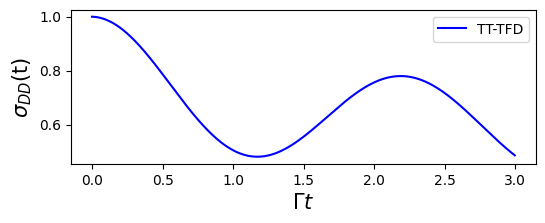

In [12]:
#read and plot
t, RDO_arr = wr.read_operator_array(pa.TIME_STEPS,folder_path+"/qflux/GQME/TTTFD_Output/TFDSigma_")
plt.figure(figsize=(6,2))
plt.plot(t, RDO_arr[:,0].real,'b-', label='TT-TFD')
plt.xlabel('$\Gamma t$',fontsize=15)
plt.ylabel('$\sigma_{DD}$(t)',fontsize=15)
plt.legend()

#Using GQME to simulate Spin-Boson Model dynamics

##The projected Liouvillian: pure system evolution

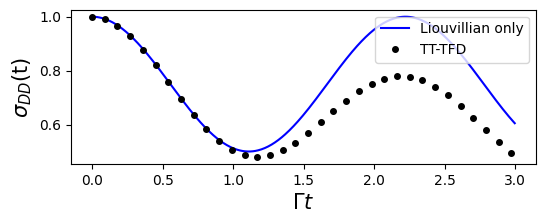

In [13]:
import scipy.linalg as LA

#propagate the pure system Liouville equation
sigma_liou = SBM.prop_puresystem()

#read TT-TFD result and plot to compare
timeVec, sigma_tt_tfd = wr.read_operator_array(pa.TIME_STEPS,folder_path+"/qflux/GQME/TTTFD_Output/TFDSigma_")

plt.figure(figsize=(6,2))
plt.plot(SBM.time_array, sigma_liou[:,0].real,'b-', label='Liouvillian only')
plt.plot(timeVec,  sigma_tt_tfd[:,0].real,'ko', markersize=4,markevery=15, label='TT-TFD')
plt.xlabel('$\Gamma t$',fontsize=15)
plt.ylabel('$\sigma_{DD}$(t)',fontsize=15)
plt.legend(loc = 'upper right')

## Calculating the Memory Kernel

### get the propagator for memory kernel calculation

In [16]:
#The line below calculates all U elements with TT-TFD. The expected waiting time is 40 minutes on Google Colab.
#To save time, the results are already pre-computed and saved, and Is_run_dynamics is therefore set as False.
#The following code would still run normally. Please set Is_run_dynamics = True if one wishes to perform these calculations.
if Is_run_dynamics:
  print('==================now using tt-tfd to calculate propagator')
  timeVec,Gt = SBM.cal_propagator_tttfd()
  print('End of calculate propagator')

  #output the propagator
  wr.output_superoper_array(timeVec,Gt,folder_path+"/qflux/GQME/U_Output/U_")
else:
  timeVec,Gt = wr.read_superoper_array(pa.TIME_STEPS,folder_path+"/qflux/GQME/U_Output/U_")
  SBM.setup_propagator(Gt)

###volterra scheme: calculating the Memory kernel and output to the file

In [17]:
kernel = SBM.get_memory_kernel()

Iteration: 1
	Iteration time: 1.345160961151123
Iteration: 2
	Iteration time: 1.108567476272583
Iteration: 3
	Iteration time: 0.7714073657989502
Iteration: 4
	Iteration time: 0.7678942680358887
Iteration: 5
	Iteration time: 0.7684507369995117
Iteration: 6
	Iteration time: 0.9279842376708984
Iteration: 7
	Iteration time: 1.1433131694793701
Iteration: 8
	Iteration time: 0.7510683536529541
Number of Iterations: 8 	Volterra time: 7.587587356567383


In [18]:
#output the kernel
wr.output_superoper_array(timeVec,kernel,folder_path+"/qflux/GQME/K_Output/K_")

0

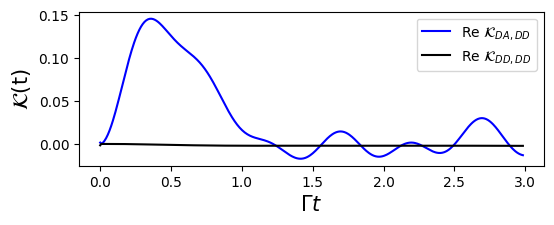

In [19]:
#plot the kernel without the last two boundary points that have numerical errors
plt.figure(figsize=(6,2))
plt.plot(timeVec[:-2], kernel[:-2,1,0].real,'b-', label='Re $\mathcal{K}_{DA,DD}$')
plt.plot(timeVec[:-2], kernel[:-2,0,0].real,'k-', label='Re $\mathcal{K}_{DD,DD}$')
plt.xlabel('$\Gamma t$',fontsize=15)
plt.ylabel('$\mathcal{K}$(t)',fontsize=15)
plt.legend(loc = 'upper right')

##Using QFlux to solve the GQME equation

In [20]:
sigma = SBM.solve_gqme(kernel, pa.MEM_TIME)

>>> Starting GQME propagation, memory time = 3.001659990105585
0
100
200
300
400


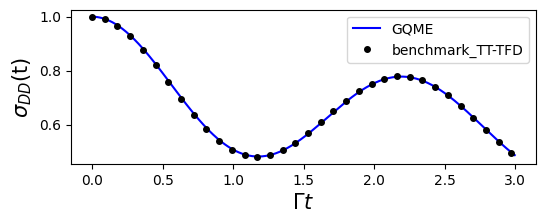

In [21]:
# Read the reference data and plot
timeVec, sigma_tt_tfd = wr.read_operator_array(pa.TIME_STEPS,folder_path+"/qflux/GQME/TTTFD_Output/TFDSigma_")

plt.figure(figsize=(6,2))
plt.plot(timeVec, sigma[:,0].real,'b-', label='GQME')
plt.plot(timeVec, sigma_tt_tfd[:,0].real ,'ko', markersize=4, markevery=15, label='benchmark_TT-TFD')
plt.xlabel('$\Gamma t$',fontsize=15)
plt.ylabel('$\sigma_{DD}$(t)',fontsize=15)
plt.legend()

# Quantum Algorithms of GQME based on Dilation

## Solving the GQME to get the propagator

In [22]:
G_prop = SBM.solve_gqme(kernel, pa.MEM_TIME, dtype='Propagator')

>>> Starting GQME propagation, memory time = 3.001659990105585
0
100
200
300
400


## Using QFlux to perform Quantum Simulation of GQME

In [23]:
from qflux.open_systems.quantum_simulation import QubitDynamicsOS

In [24]:
qSBM = QubitDynamicsOS(rep='Density', Nsys = pa.DOF_E, Hsys = Hsys, rho0 = rho0)
qSBM.set_count_str(['000','011'])
qSBM.set_dilation_method('Sz-Nagy')

pop_qc = qSBM.qc_simulation_vecdens(timeVec,Gprop=G_prop)

Quantum simulation step 0
At time 0 with shots = 1024 no counts for 011
At time 1 with shots = 1024 no counts for 011
At time 2 with shots = 1024 no counts for 011
At time 3 with shots = 1024 no counts for 011
At time 4 with shots = 1024 no counts for 011
At time 5 with shots = 1024 no counts for 011
At time 6 with shots = 1024 no counts for 011
At time 7 with shots = 1024 no counts for 011
At time 8 with shots = 1024 no counts for 011
At time 9 with shots = 1024 no counts for 011
At time 10 with shots = 1024 no counts for 011
At time 11 with shots = 1024 no counts for 011
At time 12 with shots = 1024 no counts for 011
At time 13 with shots = 1024 no counts for 011
At time 14 with shots = 1024 no counts for 011
At time 15 with shots = 1024 no counts for 011
At time 16 with shots = 1024 no counts for 011
At time 17 with shots = 1024 no counts for 011
At time 18 with shots = 1024 no counts for 011
At time 19 with shots = 1024 no counts for 011
At time 20 with shots = 1024 no counts for 0

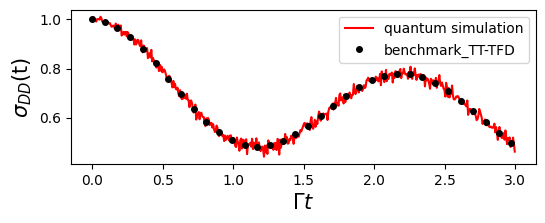

In [25]:
# Read the exact TT-TFD results
timeVec, sigma_tt_tfd = wr.read_operator_array(pa.TIME_STEPS,folder_path+"/qflux/GQME/TTTFD_Output/TFDSigma_")
# Plot the population of the donor and acceptor states
plt.figure(figsize=(6,2))
plt.plot(timeVec, pop_qc[:,0], 'r-', label="quantum simulation")
plt.plot(timeVec, sigma_tt_tfd[:,0].real ,'ko', markersize=4, markevery=15, label='benchmark_TT-TFD')
plt.xlabel('$\Gamma t$',fontsize=15)
plt.ylabel('$\sigma_{DD}$(t)',fontsize=15)
plt.legend(loc = 'upper right')
plt.show()